In [5]:
# previous seminar was about numpy
import numpy

# today we learn about pandas
import pandas
from google.colab import files
files.upload()

Saving 2-winequality-white.csv to 2-winequality-white.csv


{'2-winequality-white.csv': b'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\r\n7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6\r\n6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6\r\n8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6\r\n7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6\r\n7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6\r\n8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6\r\n6.2;0.32;0.16;7;0.045;30;136;0.9949;3.18;0.47;9.6;6\r\n7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6\r\n6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6\r\n8.1;0.22;0.43;1.5;0.044;28;129;0.9938;3.22;0.45;11;6\r\n8.1;0.27;0.41;1.45;0.033;11;63;0.9908;2.99;0.56;12;5\r\n8.6;0.23;0.4;4.2;0.035;17;109;0.9947;3.14;0.53;9.7;5\r\n7.9;0.18;0.37;1.2;0.04;16;75;0.992;3.18;0.63;10.8;5\r\n6.6;0.16;0.4;1.5;0.044;48;143;0.9912;3.54;0.52;12.4;7\r\n8.3;0.42;0.62;19.25;0.04;41;

## Plotting in Jupyter with matplotlib

below we use a **magic function**. It is a term!


In [6]:
import matplotlib.pyplot as plt
# magic says: activate matplotlib, show plots inline
%matplotlib inline 

In [7]:
x = numpy.array([-3, -1.5, 0, 1, 3, 4])

print (x)
print (x ** 2) # squared each element

[-3.  -1.5  0.   1.   3.   4. ]
[ 9.    2.25  0.    1.    9.   16.  ]


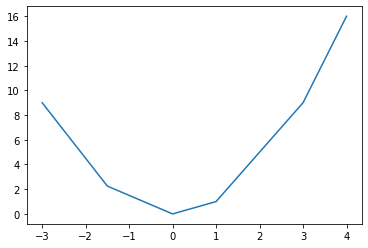

In [8]:
plt.plot(x, x ** 2)

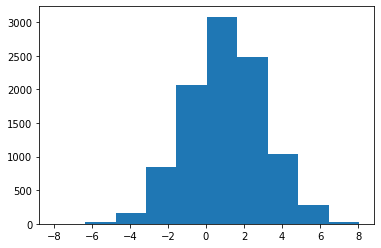

In [9]:
distribution = numpy.random.normal(loc=1., scale=2, size=10000)
plt.hist(distribution)
pass # it is the way to suppress printing output of last line. pass = 'do nothing'

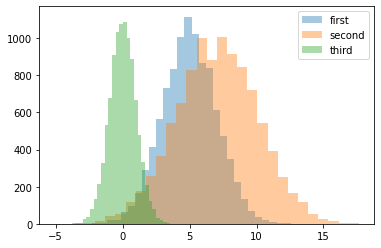

In [10]:
plt.hist(numpy.random.normal(loc=5., scale=2, size=10000), bins=30, alpha=0.4,  label='first')
plt.hist(numpy.random.normal(loc=7., scale=3, size=10000), bins=30, alpha=0.4,  label='second')
plt.hist(numpy.random.normal(loc=0., scale=1, size=10000), bins=30, alpha=0.4,  label='third')
plt.legend()
pass

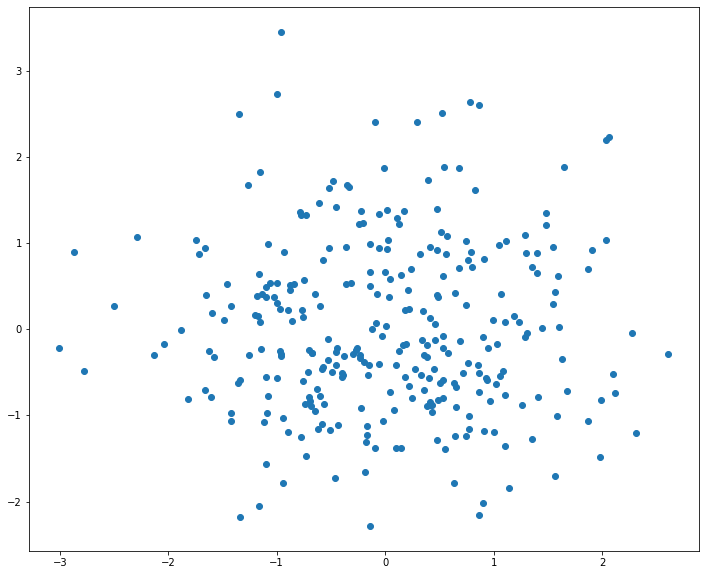

In [11]:
# Large scatter plot
plt.figure(figsize=[12, 10])
plt.scatter(numpy.random.normal(size=300), numpy.random.normal(size=300))

## Magics

magics are not needed so far, those are just for the information

In [ ]:
# sample two arrays of random numbers sampled from uniform [0, 1]
a = numpy.random.random(size=1000000)
%time b = numpy.random.random(size=1000000)
# measure time needed for operation
%time result = a + b

CPU times: user 12.5 ms, sys: 1.93 ms, total: 14.4 ms
Wall time: 14.3 ms
CPU times: user 1.25 ms, sys: 4.07 ms, total: 5.32 ms
Wall time: 4.55 ms


In [ ]:
%%time
# measure the time needed to run whole cell (%%, not %)
a = numpy.random.random(size=1000000)
b = numpy.random.random(size=1000000)
result = a + b

CPU times: user 17.9 ms, sys: 14.4 ms, total: 32.2 ms
Wall time: 34.8 ms


In [ ]:
%%prun 
# profiling of complex code
numpy.histogram(x)

In [ ]:
# general info about magics in Jupyter
%magic

# Hello Pandas

Looking at the data

In [12]:
!head 2-winequality-white.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6
8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6
6.2;0.32;0.16;7;0.045;30;136;0.9949;3.18;0.47;9.6;6
7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6


In [13]:
data = pandas.read_csv('2-winequality-white.csv', sep=';')
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [14]:
# split into description and target
y = data['quality']
X = data.drop('quality', axis=1)

In [135]:
X.head(40)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0


## Operations on data with pandas

In [136]:
#leaving only 8 rows for testing
test_frame = data[:8].copy()

In [137]:
test_frame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6


In [138]:
test_frame['density']

0    1.0010
1    0.9940
2    0.9951
3    0.9956
4    0.9956
5    0.9951
6    0.9949
7    1.0010
Name: density, dtype: float64

In [139]:
# converting to numpy.array with .values
test_frame['density'].values

array([1.001 , 0.994 , 0.9951, 0.9956, 0.9956, 0.9951, 0.9949, 1.001 ])

In [140]:
test_frame['fixed acidity'][:5]

0    7.0
1    6.3
2    8.1
3    7.2
4    7.2
Name: fixed acidity, dtype: float64

In [141]:
# indexing with numbers - iloc
test_frame.iloc[[0, 4, 7], 2:7]

,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide
0,0.36,20.7,0.045,45.0,170.0
4,0.32,8.5,0.058,47.0,186.0
7,0.36,20.7,0.045,45.0,170.0


In [142]:
# indexing with named labels - loc
test_frame.loc[:, ['volatile acidity', 'fixed acidity']]

,volatile acidity,fixed acidity
0,0.27,7.0
1,0.30,6.3
2,0.28,8.1
3,0.23,7.2
4,0.23,7.2
5,0.28,8.1
6,0.32,6.2
7,0.27,7.0


In [143]:
# shortcut for previous
test_frame[['volatile acidity', 'fixed acidity']]

,volatile acidity,fixed acidity
0,0.27,7.0
1,0.30,6.3
2,0.28,8.1
3,0.23,7.2
4,0.23,7.2
5,0.28,8.1
6,0.32,6.2
7,0.27,7.0


In [144]:
# [start:end:step], some of arguments can be omitted.
test_frame.iloc[::3, ::-1]

,quality,alcohol,sulphates,pH,density,total sulfur dioxide,free sulfur dioxide,chlorides,residual sugar,citric acid,volatile acidity,fixed acidity
0,6,8.8,0.45,3.00,1.0010,170.0,45.0,0.045,20.7,0.36,0.27,7.0
3,6,9.9,0.40,3.19,0.9956,186.0,47.0,0.058,8.5,0.32,0.23,7.2
6,6,9.6,0.47,3.18,0.9949,136.0,30.0,0.045,7.0,0.16,0.32,6.2


In [145]:
# adding new feature with vector operation
test_frame['dioxide sum'] = test_frame['total sulfur dioxide'] + test_frame['free sulfur dioxide']
test_frame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,dioxide sum
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,215.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,146.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,127.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,233.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,233.0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,127.0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,166.0
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,215.0


In [146]:
# filtering dataset
filtered_data = data[data['density'] < 0.988]
filtered_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2945,4.9,0.330,0.31,1.2,0.016,39.0,150.0,0.98713,3.33,0.59,14.00,8
3367,6.0,0.290,0.25,1.4,0.033,30.0,114.0,0.98794,3.08,0.43,13.20,6
3370,6.0,0.290,0.25,1.4,0.033,30.0,114.0,0.98794,3.08,0.43,13.20,6
3673,5.4,0.300,0.30,1.2,0.029,25.0,93.0,0.98742,3.31,0.40,13.60,7
3676,5.3,0.300,0.30,1.2,0.029,25.0,93.0,0.98742,3.31,0.40,13.60,7
3710,4.7,0.670,0.09,1.0,0.020,5.0,9.0,0.98722,3.30,0.34,13.60,5
3773,5.0,0.610,0.12,1.3,0.009,65.0,100.0,0.98740,3.26,0.37,13.50,5
3904,5.0,0.455,0.18,1.9,0.036,33.0,106.0,0.98746,3.21,0.83,14.00,7
3915,4.7,0.455,0.18,1.9,0.036,33.0,106.0,0.98746,3.21,0.83,14.00,7
3918,6.4,0.350,0.28,1.6,0.037,31.0,113.0,0.98779,3.12,0.40,14.20,7


In [27]:
print len(test_frame)
print test_frame.shape 
print test_frame.columns

SyntaxError: ignored

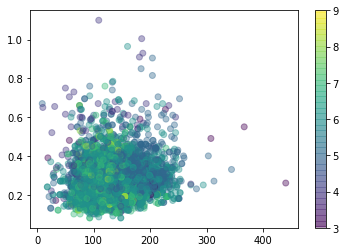

In [147]:
plt.scatter(X['total sulfur dioxide'], X['volatile acidity'], c=y, alpha=0.4)
plt.colorbar()

## Homework

### Problem 1
plot histograms couple of features from the dataframe

(array([  20.,  163.,    0., 1457.,    0., 2198.,  880.,    0.,  175.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <a list of 10 Patch objects>)

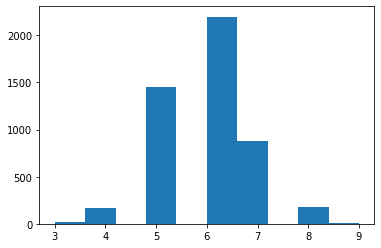

In [148]:
plt.hist(data.quality)



(array([ 37., 808., 969., 761., 765., 625., 427., 368., 110.,  28.]),
 array([ 8.  ,  8.62,  9.24,  9.86, 10.48, 11.1 , 11.72, 12.34, 12.96,
        13.58, 14.2 ]),
 <a list of 10 Patch objects>)

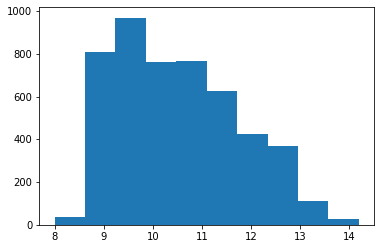

In [149]:
plt.hist(data.alcohol)

(array([  83.,  931., 1440., 1402.,  595.,  263.,  134.,   26.,   20.,
           4.]),
 array([0.22 , 0.306, 0.392, 0.478, 0.564, 0.65 , 0.736, 0.822, 0.908,
        0.994, 1.08 ]),
 <a list of 10 Patch objects>)

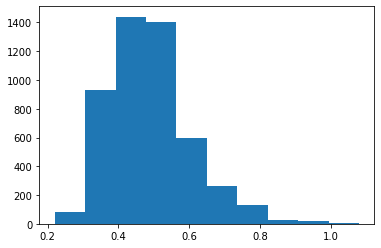

In [150]:
plt.hist(data.sulphates)

### Problem 2
Let's classify wines in:
   * good means quality >= 7
   * bad means quality <= 4
   * mediocre means quality five or six
   
Plot histograms of all features for good and bad wines. Which feature is the most discriminative?
   

(array([ 3., 22., 40., 33., 36., 21., 17.,  3.,  7.,  1.]),
 array([ 8.  ,  8.55,  9.1 ,  9.65, 10.2 , 10.75, 11.3 , 11.85, 12.4 ,
        12.95, 13.5 ]),
 <a list of 10 Patch objects>)

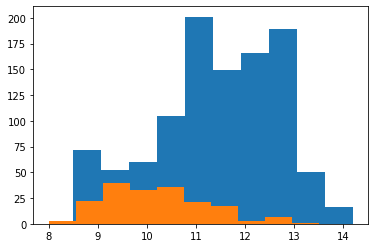

In [151]:
good = data[data.quality>=7]
bad = data[data.quality<=4]

plt.hist(good.alcohol)
plt.hist(bad.alcohol)


(array([10., 30., 29., 43., 30., 18., 14.,  5.,  2.,  2.]),
 array([0.25 , 0.312, 0.374, 0.436, 0.498, 0.56 , 0.622, 0.684, 0.746,
        0.808, 0.87 ]),
 <a list of 10 Patch objects>)

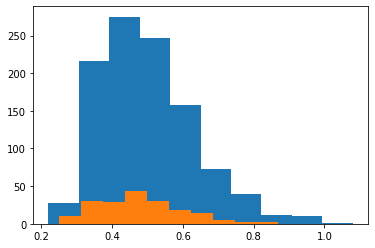

In [152]:
plt.hist(good.sulphates)
plt.hist(bad.sulphates)

(array([ 8., 15., 39., 42., 30., 22., 11., 12.,  2.,  2.]),
 array([2.83 , 2.919, 3.008, 3.097, 3.186, 3.275, 3.364, 3.453, 3.542,
        3.631, 3.72 ]),
 <a list of 10 Patch objects>)

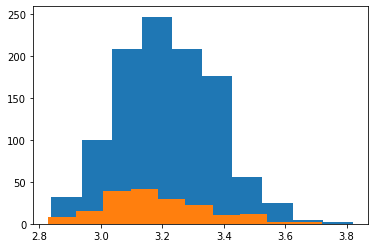

In [153]:
plt.hist(good.pH)
plt.hist(bad.pH)

(array([ 7., 20., 18., 31., 31., 29., 15., 16., 11.,  5.]),
 array([0.9892 , 0.99032, 0.99144, 0.99256, 0.99368, 0.9948 , 0.99592,
        0.99704, 0.99816, 0.99928, 1.0004 ]),
 <a list of 10 Patch objects>)

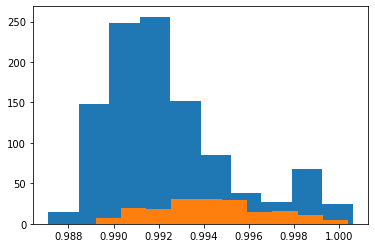

In [154]:
plt.hist(good.density)
plt.hist(bad.density)

(array([ 20.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 163.]),
 array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ]),
 <a list of 10 Patch objects>)

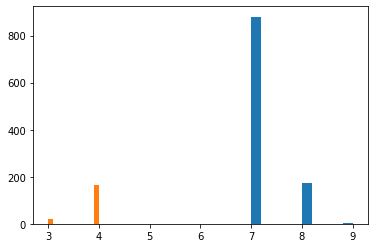

In [155]:
plt.hist(good.quality)
plt.hist(bad.quality)

(array([ 62., 107.,   9.,   1.,   2.,   0.,   0.,   0.,   1.,   1.]),
 array([0.013 , 0.0407, 0.0684, 0.0961, 0.1238, 0.1515, 0.1792, 0.2069,
        0.2346, 0.2623, 0.29  ]),
 <a list of 10 Patch objects>)

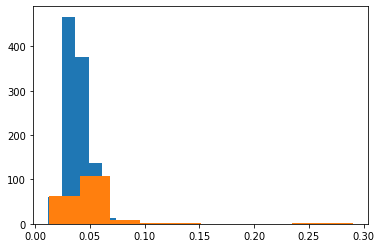

In [156]:
plt.hist(good.chlorides)
plt.hist(bad.chlorides)

(array([13., 20., 43., 41., 27., 26.,  6.,  3.,  3.,  1.]),
 array([0.   , 0.088, 0.176, 0.264, 0.352, 0.44 , 0.528, 0.616, 0.704,
        0.792, 0.88 ]),
 <a list of 10 Patch objects>)

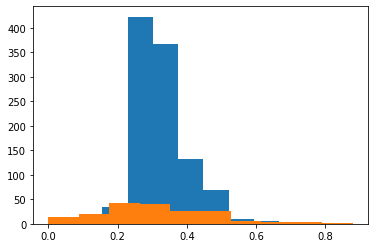

In [157]:
t1=good['citric acid']
plt.hist(t1)
t2=bad['citric acid']
plt.hist(t2)


(array([ 2.,  6., 44., 63., 26., 23., 11.,  6.,  1.,  1.]),
 array([ 4.2 ,  4.96,  5.72,  6.48,  7.24,  8.  ,  8.76,  9.52, 10.28,
        11.04, 11.8 ]),
 <a list of 10 Patch objects>)

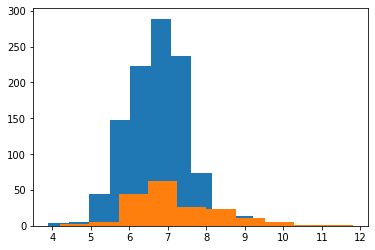

In [158]:
u1=good['fixed acidity']
u2=bad['fixed acidity']
plt.hist(u1)
plt.hist(u2)

(array([17., 63., 48., 17., 16., 15.,  3.,  0.,  2.,  2.]),
 array([0.11 , 0.209, 0.308, 0.407, 0.506, 0.605, 0.704, 0.803, 0.902,
        1.001, 1.1  ]),
 <a list of 10 Patch objects>)

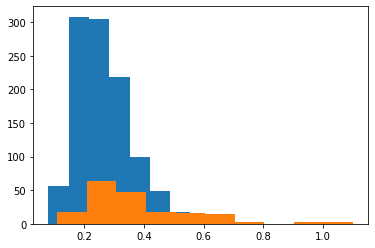

In [159]:
u3=good['volatile acidity']
u4=bad['volatile acidity']
plt.hist(u3)
plt.hist(u4)

(array([86., 17., 22., 12., 10., 14.,  7.,  6.,  7.,  2.]),
 array([ 0.7  ,  2.385,  4.07 ,  5.755,  7.44 ,  9.125, 10.81 , 12.495,
        14.18 , 15.865, 17.55 ]),
 <a list of 10 Patch objects>)

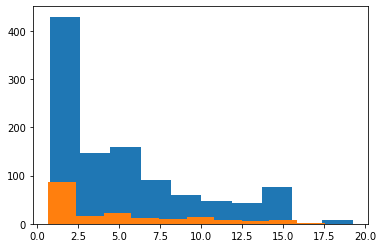

In [160]:
u5=good['residual sugar']
u6=bad['residual sugar']
plt.hist(u5)
plt.hist(u6)

(array([133.,  35.,   9.,   0.,   4.,   1.,   0.,   0.,   0.,   1.]),
 array([  3. ,  31.6,  60.2,  88.8, 117.4, 146. , 174.6, 203.2, 231.8,
        260.4, 289. ]),
 <a list of 10 Patch objects>)

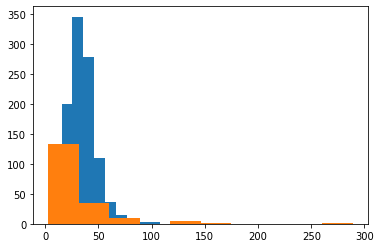

In [161]:
u7=good['free sulfur dioxide']
u8=bad['free sulfur dioxide']
plt.hist(u7)
plt.hist(u8)

(array([13., 42., 54., 36., 29.,  5.,  2.,  0.,  1.,  1.]),
 array([ 10.,  53.,  96., 139., 182., 225., 268., 311., 354., 397., 440.]),
 <a list of 10 Patch objects>)

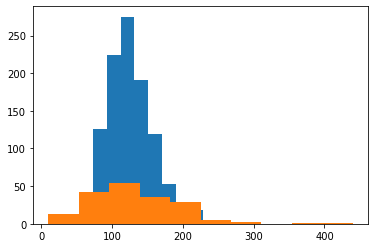

In [172]:
u9=good['total sulfur dioxide']
u10=bad['total sulfur dioxide']
plt.hist(u9, label='good')
plt.hist(u10, label='bad')

### Problem 3   
Plot some scatter plots:
   - alcohol vs fixed acidity for good and bad wines, what can we say about good wines?
   - alcohol vs fixed acidity for quality=5 and quality=6
   - alcohol vs density for good and bad wines. What can we conclude?

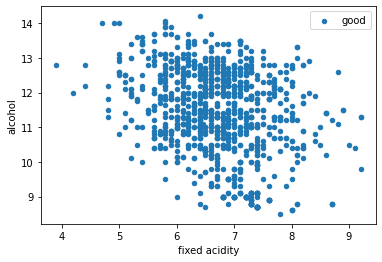

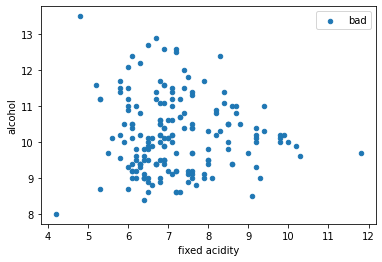

In [164]:
good.plot.scatter('fixed acidity', 'alcohol', label='good')
bad.plot.scatter('fixed acidity', 'alcohol', label='bad')


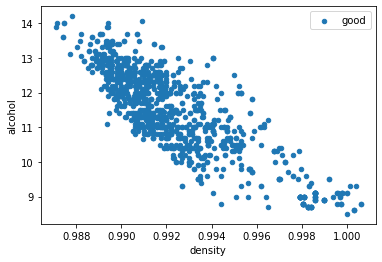

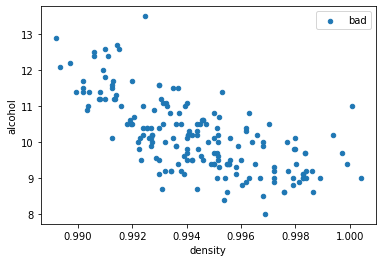

In [166]:
good.plot.scatter('density', 'alcohol', label='good')
bad.plot.scatter('density', 'alcohol', label='bad')

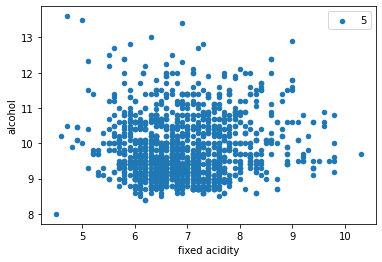

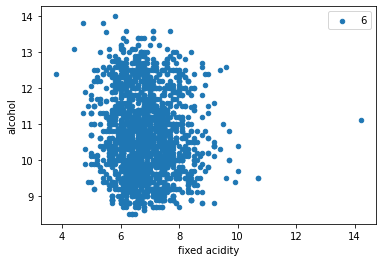

In [167]:
md5 = data[data.quality==5]
md6 = data[data.quality==6]
md5.plot.scatter('fixed acidity', 'alcohol', label='5')
md6.plot.scatter('fixed acidity', 'alcohol', label='6')


# References 
1. [matplotlib gallery](http://matplotlib.org/gallery.html)
2. [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
    * almost any question about these tools is already answered on stackoverflow